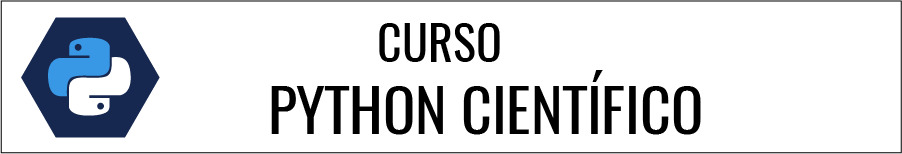

# Cálculo de Transformadas rápidas de Fourier con SciPy

La transformada de Fourier, denominada así por Joseph Fourier, es una transformación matemática empleada para transformar señales entre el dominio del tiempo (o espacial) y el dominio de la frecuencia, que tiene muchas aplicaciones en la física y la ingeniería. Es reversible, siendo capaz de transformarse en cualquiera de los dominios al otro. El propio término se refiere tanto a la operación de transformación como a la función que produce.

En el caso de una función periódica en el tiempo (por ejemplo, un sonido musical continuo pero no necesariamente sinusoidal), la transformada de Fourier se puede simplificar para el cálculo de un conjunto discreto de amplitudes complejas, llamado coeficientes de las series de Fourier. Ellos representan el espectro de frecuencia de la señal del dominio-tiempo original.

La transformada de Fourier es una aplicación que hace corresponder a una función f f con otra función g g definida de la manera siguiente: 

\begin{equation}
g(f) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty}h(t) \, e^{-i f t} dt
\end{equation}

 h(t) tiene que ser una función integrable en el sentido de la integral de Lebesgue.
 
  En la práctica, las variables t y f suelen estar asociadas a dimensiones como el tiempo —segundos— y frecuencia —hercios— respectivamente.
  La Transformada inversa queda expresada por la siguiente ecuación:
  
 \begin{equation}
h(t) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty}g(f) \, e^{i f t} df
\end{equation}


https://es.wikipedia.org/wiki/Transformada_de_Fourier


## Transformadas discretas de Fourier 1-D

Las transformadas pueden calcularse mediante fft y ifft, respectivamente, como se muestra en el siguiente ejemplo.  
La FFT y [k] de longitud de la secuencia x [n] que definiremos.

Estas transformaciones pueden calcularse mediante ffty ifft, respectivamente, como se muestra en el siguiente ejemplo.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from scipy import fft, ifft

In [29]:
t = np.array([0, 1, 2, 3, 4])
h = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
g = fft.fft(h)

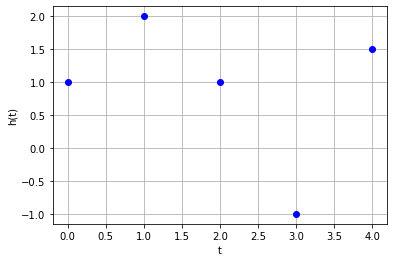

In [30]:
plt.plot(t, h, 'bo')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.grid()

In [31]:
print(g)

[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]


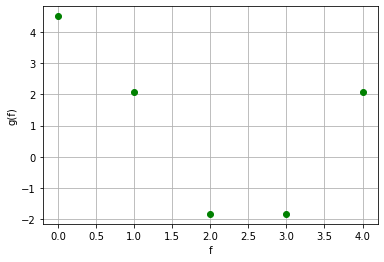

In [32]:
plt.plot(g.real, 'go')
plt.xlabel('f')
plt.ylabel('g(f)')
plt.grid()

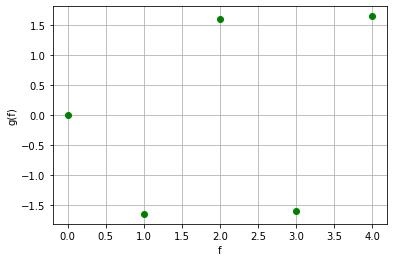

In [33]:
plt.plot(g.imag, 'go')
plt.xlabel('f')
plt.ylabel('g(f)')
plt.grid()

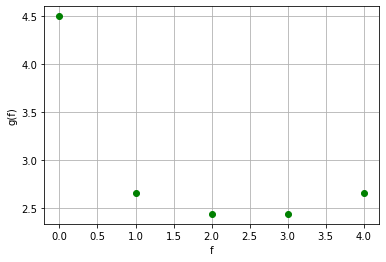

In [34]:
plt.plot(abs(g), 'go')
plt.xlabel('f')
plt.ylabel('g(f)')
plt.grid()

In [35]:
ginv = fft.ifft(g)
print('g inv      :', ginv)
print('g inv.real :', ginv.real)
print('g inv.imag :', ginv.imag)
print('abs(g inv) :', np.abs(ginv))
print('g         :', t)
# Comparemos esta salida con el vector t

g inv      : [ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]
g inv.real : [ 1.   2.   1.  -1.   1.5]
g inv.imag : [0. 0. 0. 0. 0.]
abs(g inv) : [1.  2.  1.  1.  1.5]
g         : [0 1 2 3 4]


## Ejemplo del cálculo de la FFT de la suma de dos ondas senoidales

Una onda senoidal unidmensional tiene la siguiente expresión matemática:
\begin{equation}
h(x, t) = A \sin \left[ 2\pi \big(\frac{x}{\lambda}-\frac{t}{T} \big)  \right]
\end{equation}
donde $A$ es la amplitud de la onda, $\lambda$ la longitud de la onda, $T$ es el período de la onda, y $x$ y $t$ son las variables espaciales y temporales, respectivamente.

Recordemos que la fecuencia de una onda $f$, es igual a $f = 1/T$.

Y si nuestra onda no se desplaza en el espacio, podemos considerar que la variable $x$ es igual a cero, entonces una onda que solo transcurre en el tiempo y no en el espacio, podemos escribirla de la siguiente forma:
\begin{equation}
h(t) = A \sin \left[ 2\pi \big(f \cdot t\big)  \right]
\end{equation}
donde hemos reemplazado a $T$ y desestimamos el signo menos.

In [39]:
## Number of sample points
N = 4000
# sample spacing
T = 1.0 / 800.00
F1 = 50.0  # Frecuencia
F2 = 80.0  # Frecuencia
t = np.linspace(0.0, N * T, N)
sen1 = 1.0 * np.sin(2.0 * np.pi * F1 * t)
sen2 = 0.5 * np.sin( 2.0 * np.pi * F2 * t)
#y = np.sin(F1 * 2.0*np.pi*x) + 0.5*np.sin(F2 * 2.0*np.pi*x)
print(N * T)

5.0


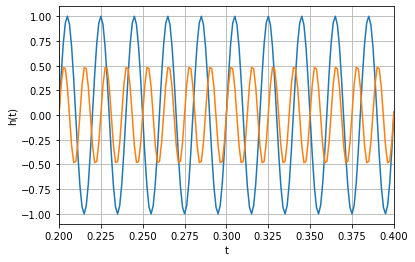

In [40]:
plt.xlim(0.2, 0.4)
plt.plot(t, sen1)
plt.plot(t, sen2)
plt.xlabel('t')
plt.ylabel('h(t)')
plt.grid()

In [41]:
h = sen1 + sen2

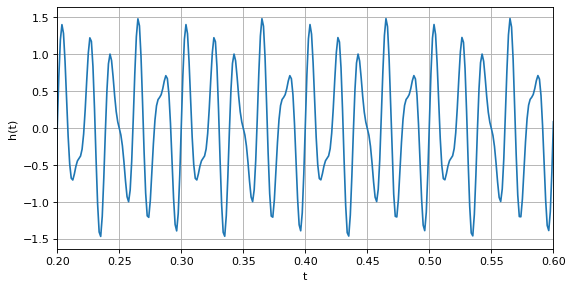

In [42]:
plt.figure(figsize=(8, 4), dpi=80)
plt.xlim(0.2, 0.6)
plt.plot(t, h)
plt.xlabel('t')
plt.ylabel('h(t)')
plt.grid()
plt.show()

In [46]:
g = fft.fft(h)
f = np.linspace(0.0, 1.0/(2.0*T), N//2)

In [47]:
1.0/(2.0*T)

400.0

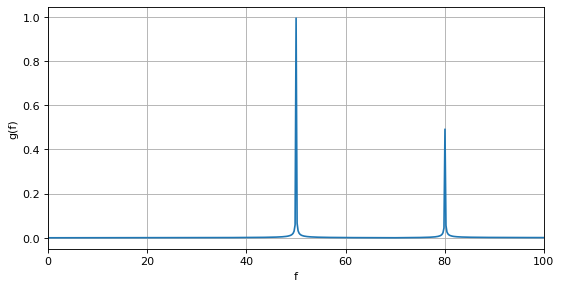

In [49]:
plt.figure(figsize=(8, 4), dpi=80)
#plt.xlim(0.0, 400.0)
plt.xlim(0.0, 100.0)
# a g solamente la graficamos hasta N//2
plt.plot(f, 2.0/N * np.abs(g[0:N//2]))
plt.xlabel('f')
plt.ylabel('g(f)')
plt.grid()
plt.show()

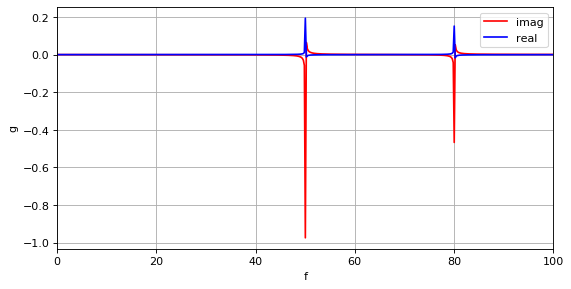

In [50]:
plt.figure(figsize=(8, 4), dpi=80)
plt.xlim(0.0, 100.0)
plt.plot(f, 2.0/N * g[0:N//2].imag, c="r", label='imag')
plt.plot(f, 2.0/N * g[0:N//2].real, c="b", label='real')
plt.xlabel('f')
plt.ylabel('g')
plt.grid()
plt.legend()
plt.show()

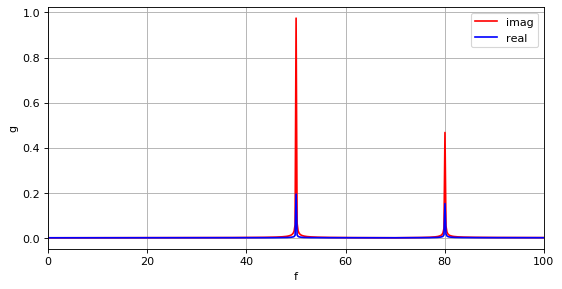

In [52]:
plt.figure(figsize=(8, 4), dpi=80)
plt.xlim(0.0, 100.0)
plt.plot(f, 2.0/N * np.abs(g[0:N//2].imag), c="r", label='imag')
plt.plot(f, 2.0/N * np.abs(g[0:N//2].real), c="b", label='real')
plt.xlabel('f')
plt.ylabel('g')
plt.grid()
plt.legend()
plt.show()

La señal de entrada FFT está inherentemente truncada. Este truncamiento puede modelarse como una multiplicación de una señal infinita con una función de ventana rectangular. En el dominio espectral, esta multiplicación se convierte en convolución del espectro de señal con el espectro de función de ventana, siendo de forma $sin(x)/x$. 

Esta convolución es la causa de un efecto llamado fuga espectral (ver [WPW] ). 

La ventana de la señal con una función de ventana dedicada ayuda a mitigar la fuga espectral. 

El siguiente ejemplo utiliza una ventana Blackman de scipy.signal y muestra el efecto de la ventana (el componente cero de la FFT se ha truncado con fines ilustrativos).

La ventana Blackman es un cono formado mediante el uso de los primeros tres términos de una suma de cosenos. Fue diseñado para tener cerca de la mínima fuga posible. 
La mayoría de las referencias a la ventana Blackman provienen de la literatura de procesamiento de señales, donde se utiliza como una de las muchas funciones de ventanas para suavizar los valores. También se conoce como apodización (que significa "quitar el pie", es decir, suavizar las discontinuidades al principio y al final de la señal muestreada) o función de disminución gradual.

https://www.ni.com/es-cr/innovations/white-papers/06/understanding-ffts-and-windowing.htmlhttps://www.ni.com/es-cr/innovations/white-papers/06/understanding-ffts-and-windowing.html

In [18]:
# Importamos la fft
# from scipy import fft

In [97]:
# Number of sample points
N = 4000   # sample spacing
T = 1.0 / 800.0
t = np.linspace(0.0, N*T, N)
h = 1.0 * np.sin(2.0 * np.pi * F1 *  t) + 0.5*np.sin(2.0 * np.pi * F2 * t)
f = np.linspace(0.0, 1.0/(2.0*T), N//2)
g = fft.fft(h) 

In [98]:
# Importamos blackman
from scipy.signal import blackman

In [99]:
w = blackman(N)
gw = fft.fft(h * w)

In [100]:
print(w)

[-1.38777878e-17  2.22177372e-07  8.88711864e-07 ...  8.88711864e-07
  2.22177372e-07 -1.38777878e-17]


In [127]:
# Deebemos ser cuidadosos con los factores de Normalización
fact = 2.0*abs(g.max())/abs(gw.max())
print(fact)

4.7424078367089635


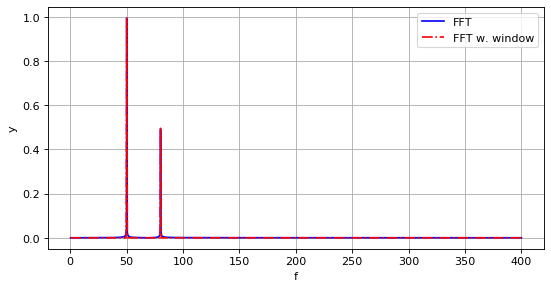

In [126]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4), dpi=80)
#plt.semilogy(f[1:N//2], 2.0/N * np.abs(g[1:N//2]), '-b')
#plt.semilogy(f[1:N//2], 4.0/N * np.abs(gw[1:N//2]), '-r')
plt.plot(f[1:N//2], 2.0/N  * np.abs(g[1:N//2]), '-b')
plt.plot(f[1:N//2], fact/N  * np.abs(gw[1:N//2]), '-.r')

plt.legend(['FFT', 'FFT w. window'])
plt.xlabel('f')
plt.ylabel('y')
#plt.ylim(0, 0.05)
plt.grid()
plt.show()

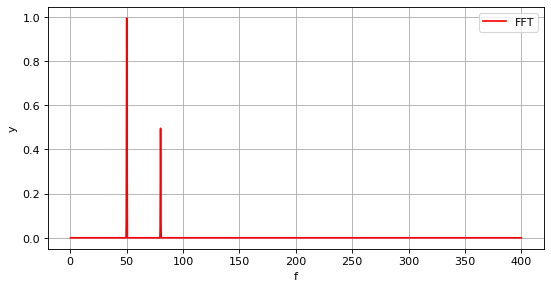

In [128]:
plt.figure(figsize=(8, 4), dpi=80)
#plt.plot(x2f[1:N//2], 2.0/N * np.abs(y2wf[1:N//2]), '-b')
plt.plot(f[1:N//2], fact/N * np.abs(gw[1:N//2]), '-r')
#plt.plot(x2f[1:N//2], np.abs(y2wf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.xlabel('f')
plt.ylabel('y')
plt.grid()
plt.show()

### Transformación Coseno Discreta

SciPy proporciona un DCT con la función `dct` y un IDCT correspondiente con la función `idct` .

El DCT exhibe la "propiedad de compactación de energía", lo que significa que para muchas señales solo los primeros coeficientes DCT tienen una magnitud significativa. 
Poner a cero los otros coeficientes conduce a un pequeño error de reconstrucción, un hecho que se explota en la compresión de señal con pérdida (por ejemplo, compresión JPEG).

El siguiente ejemplo muestra una señal $x$ y dos reconstrucciones ($x_{20}$ y $x_{15}$) de los coeficientes DCT de la señal. 

La señal se reconstruye a partir de los primeros 20 coeficientes DCT, $x_{15}$ se reconstruye a partir de los primeros 15 coeficientes DCT. Se puede ver que el error relativo de usar 20 coeficientes sigue siendo muy pequeño (~ 0.1%), pero proporciona una tasa de compresión de cinco veces.

In [112]:
#from scipy import dct, idct
from scipy.fftpack import dct, idct

In [52]:
# import matplotlib.pyplot as plt

In [113]:
N = 100
t = np.linspace(0, 20, N)
x = np.exp(-t / 3.0) * np.cos(2.0 * t)
y = dct(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
xr = idct(y * window, norm ='ortho')
sum(abs(x-xr)**2) / sum(abs(x)**2)

0.001090140225700517

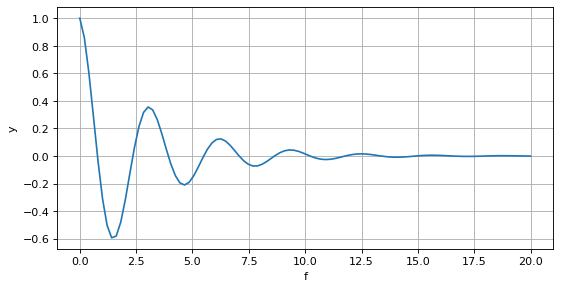

In [116]:
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(t, x)
plt.xlabel('f')
plt.ylabel('y')
plt.grid()

Primeros 15 coeficientes: 0.07188180650076796
Primeros 20 coeficientes: 0.001090140225700517


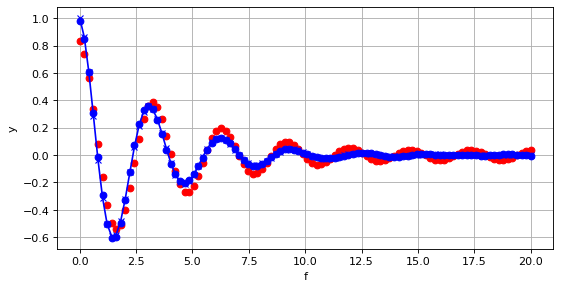

In [119]:
plt.figure(figsize=(8, 4), dpi=80)
#plt.plot(t, x, '-bx')
#plt.plot(t, yr, 'ro')
window = np.zeros(N)
window[:15] = 1
xr15 = idct(y * window, norm = 'ortho')
xr15none = idct(y * window)
print('Primeros 15 coeficientes:', sum(abs(x-xr15)**2) / sum(abs(x)**2))
window[:20] = 1
xr20 = idct(y * window, norm = 'ortho')
print('Primeros 20 coeficientes:', sum(abs(x-xr20)**2) / sum(abs(x)**2))

plt.plot(t, xr15, 'ro')
#plt.plot(t, xr15none, 'gs')
plt.plot(t, xr20, 'bo')
plt.plot(t, x, '-bx')
plt.xlabel('f')
plt.ylabel('y')
plt.grid()

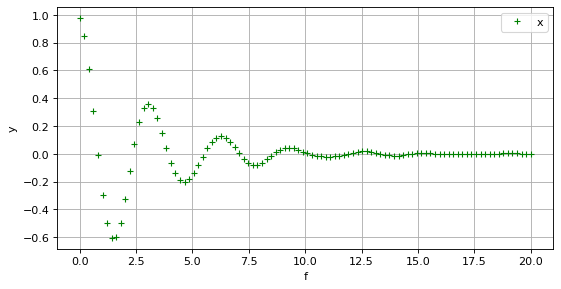

In [120]:
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(t, xr, 'g+')
plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.xlabel('f')
plt.ylabel('y')
plt.grid()